### <center> **Stage E: Practical Time Series Analysis & Forecast**

###<center>**ID: 147c5bd2f901f000**

In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices  of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

Data Set Information:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

Notes:

1. The dataset is sampled on an hourly basis. It has the following features:

Attribute Information:

FullDate: Date in format yyyy-mm-dd  hh:mm:ss
ElecPrice: Prices of electricity charged in Kw per hour
Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T
SysLoad: Total Load on system or Power consumed at time-T 
Tmax: maximum temperature at time-T



In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [18]:
path = '/content/drive/MyDrive/Internship/Homoye/Stage E/dataset/Time_series_analysis_and_forecast_DATASET.csv'
data = pd.read_csv(path)
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [13]:
# data shape
data.shape

(92016, 5)

In [14]:
#  check missing data
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

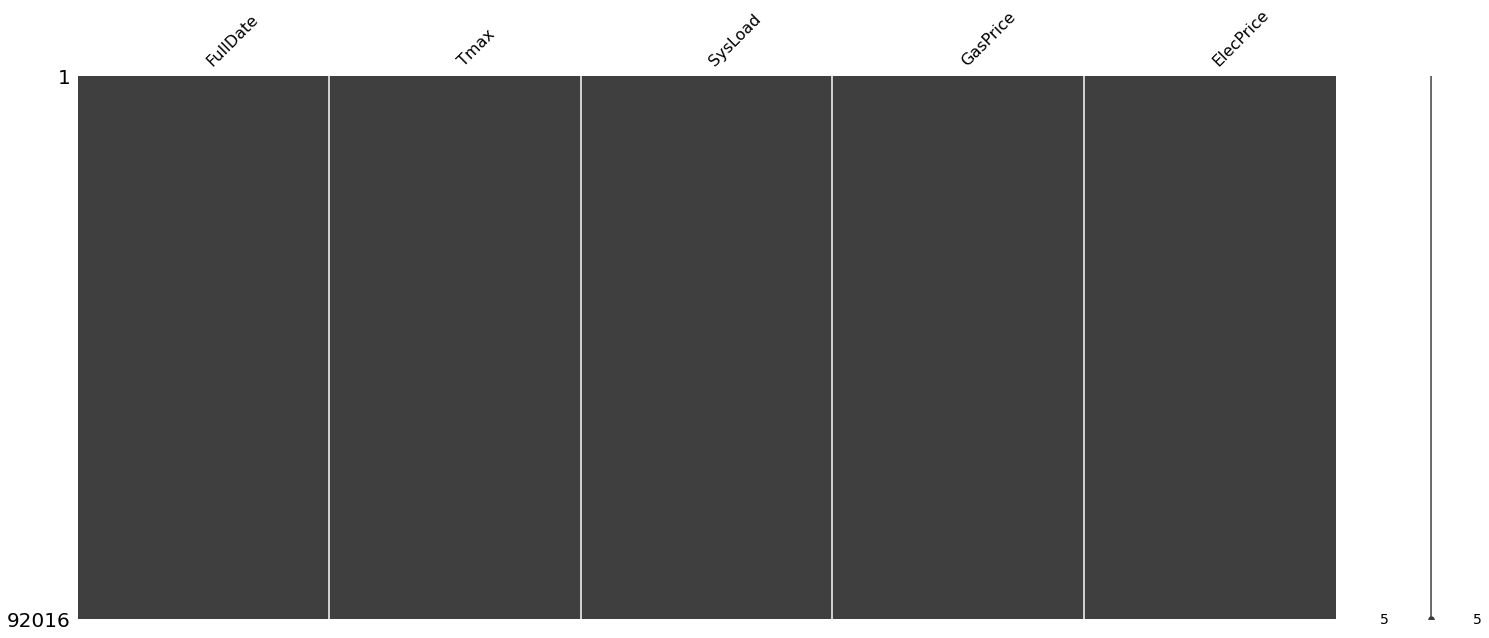

In [ ]:
msno.matrix(data)

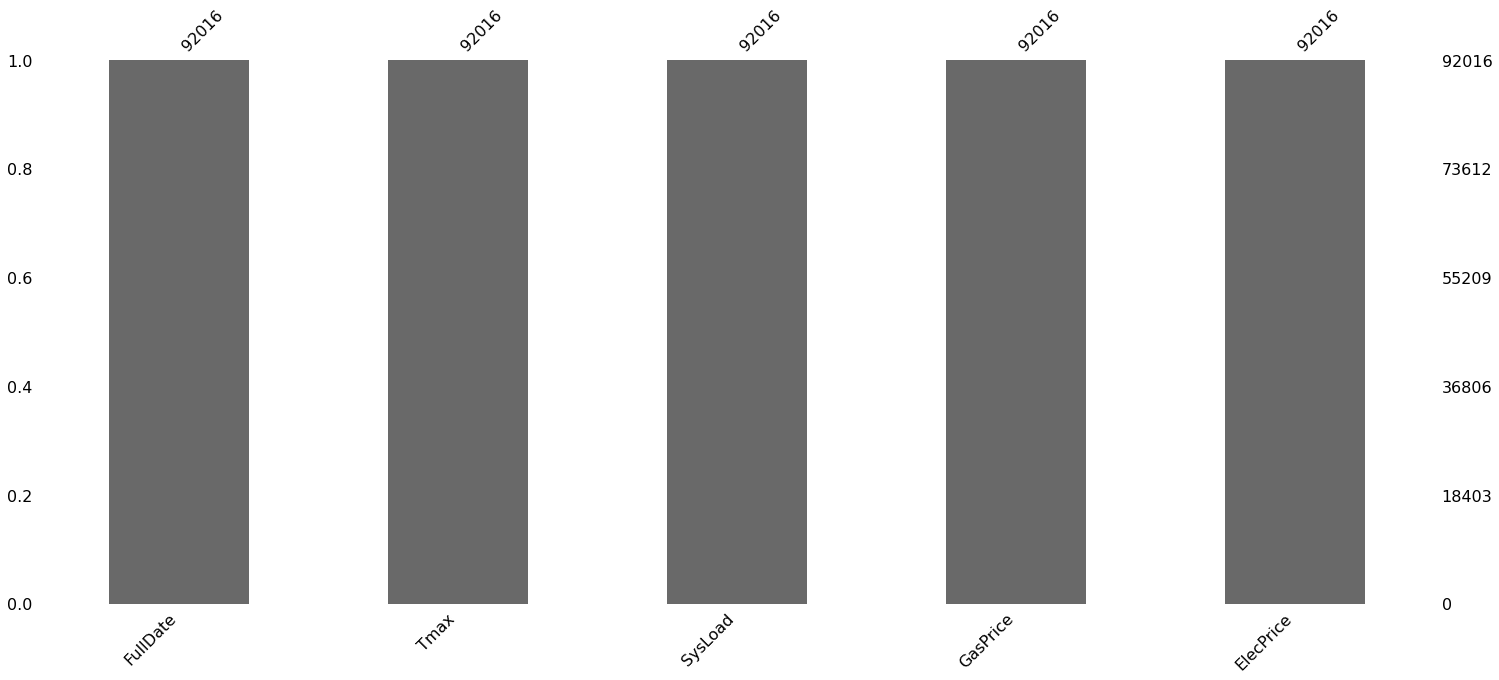

In [ ]:
msno.bar(data);

The data doesn't contains missing values.

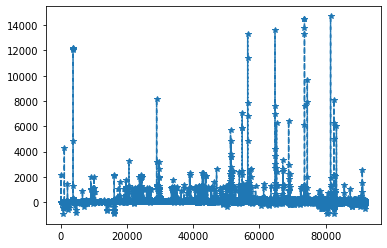

In [ ]:
plt.plot(data.index, data.ElecPrice, '--', marker='*')
plt.show()

**Q11: plot of ElecPrice over time**

In [19]:
#Upsample to daily data points
data['FullDate'] = pd.to_datetime(data['FullDate']) ##convert column to datetime
data.set_index('FullDate', inplace=True)
data_daily = data.resample( 'D' ).mean()
data_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


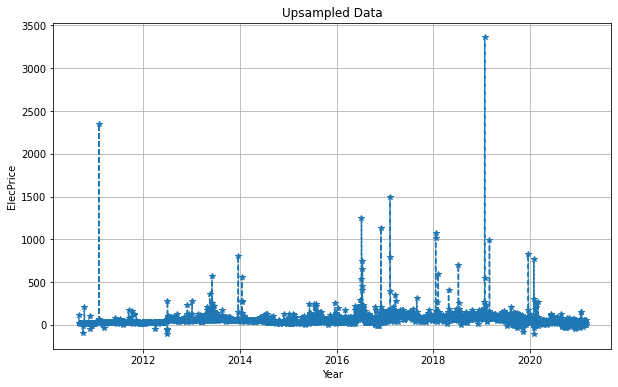

In [21]:
plt.figure(figsize=(10,6))
plt.plot(data_daily.index, data_daily.ElecPrice, '--', marker='*')
plt.xlabel('Year')
plt.ylabel('ElecPrice')
plt.title('Upsampled Data')
plt.grid()
plt.show()

**Q12: Augmented Dicky Fuller test (ADF)**

In [26]:
# For SysLoad
adf_result = adfuller(data_daily[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {round(adf_result[ 1 ], 6)}' )
print( f'No. of lags used: {adf_result[ 2 ]}' )
print( f'No. of observations used : {adf_result[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{v}')

ADF Statistic: -3.6901589888366413
p-value: 0.004254
No. of lags used: 30
No. of observations used : 3803
Critical Values:
1%:-3.432070672988693
5%:-2.8623002987378547
10%:-2.567174716967499


In [28]:
# For GasPricee
adf_result = adfuller(data_daily[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {round(adf_result[ 1 ], 6)}' )
print( f'No. of lags used: {adf_result[ 2 ]}' )
print( f'No. of observations used : {adf_result[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{round(v,4)}')

ADF Statistic: -2.902766697165181
p-value: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1%:-3.4321
5%:-2.8623
10%:-2.5672


Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places are, respectively:

**0.004254, 0.045027**

**Q13: Augmented Dicky Fuller test (ADF)**

In [46]:
# For GasPrice
adf_result = adfuller(data_daily[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {round(adf_result[ 1 ], 6)}' )
print( f'No. of lags used: {adf_result[ 2 ]}' )
print( f'No. of observations used : {adf_result[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{round(v,4)}')

ADF Statistic: -2.902766697165181
p-value: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1%:-3.4321
5%:-2.8623
10%:-2.5672


In [29]:
# For ElecPrice
adf_result = adfuller(data_daily[ 'ElecPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {round(adf_result[ 1 ], 6)}' )
print( f'No. of lags used: {adf_result[ 2 ]}' )
print( f'No. of observations used : {adf_result[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{round(v,4)}')

ADF Statistic: -8.269053866873804
p-value: 0.0
No. of lags used: 20
No. of observations used : 3813
Critical Values:
1%:-3.4321
5%:-2.8623
10%:-2.5672


the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places are, respectively: 

**-2.5672, -2.8623**

### Q14

In [72]:
# 
path = '/content/drive/MyDrive/Internship/Homoye/Stage E/dataset/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(path)
df = df.loc[:, ['FullDate','ElecPrice']]
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.rename(columns={'FullDate':'ds', 'ElecPrice': 'y'})
df.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [73]:
train = df.iloc[:2757, :]
test = df.iloc[2757:, :]

In [74]:
print(train.shape, test.shape)
train.head()

(2757, 2) (89259, 2)


,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [75]:
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods= 10 , freq= 'M' )

forecast=model.predict(future)
forecast.head()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,37.069420,-79.445165,170.265440,37.069420,37.069420,7.708134,7.708134,7.708134,0.310292,0.310292,0.310292,7.397842,7.397842,7.397842,0.0,0.0,0.0,44.777554
1,2010-09-01 01:00:00,37.021443,-82.369895,167.281835,37.021443,37.021443,6.711959,6.711959,6.711959,-1.572262,-1.572262,-1.572262,8.284221,8.284221,8.284221,0.0,0.0,0.0,43.733402
2,2010-09-01 02:00:00,36.973466,-84.267723,168.262319,36.973466,36.973466,3.175200,3.175200,3.175200,-5.994929,-5.994929,-5.994929,9.170129,9.170129,9.170129,0.0,0.0,0.0,40.148666
3,2010-09-01 03:00:00,36.925489,-93.792163,163.418583,36.925489,36.925489,-0.803914,-0.803914,-0.803914,-10.849093,-10.849093,-10.849093,10.045180,10.045180,10.045180,0.0,0.0,0.0,36.121575
4,2010-09-01 04:00:00,36.877512,-91.806577,158.296678,36.877512,36.877512,-3.288212,-3.288212,-3.288212,-14.187172,-14.187172,-14.187172,10.898960,10.898960,10.898960,0.0,0.0,0.0,33.589300


In [80]:
y_true = test['y']
ypred = forecast['yhat']
# Mape
mape = mean_absolute_percentage_error(y_true, ypred)
print(f'{round(mape,2)}%')

**Q15:RMSE**

In [ ]:
rmse = np.sqrt(mean_squared_error(y_true, ypred))
print(round(rmse, 2))

**Q16**: plot the components from the forecasted model

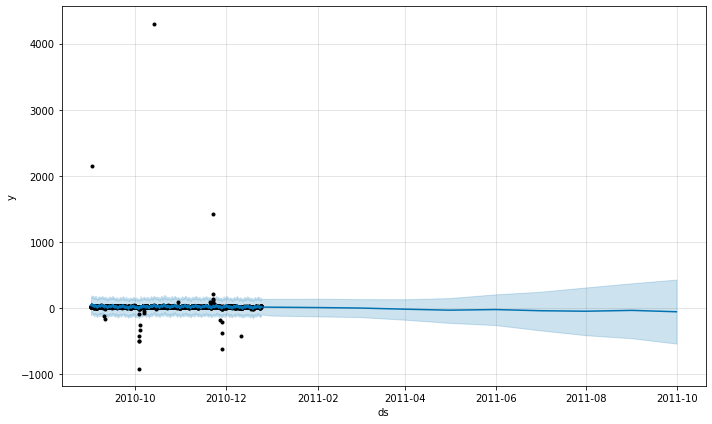

In [76]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
'''yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries'''
model.plot(forecast)
plt.show()

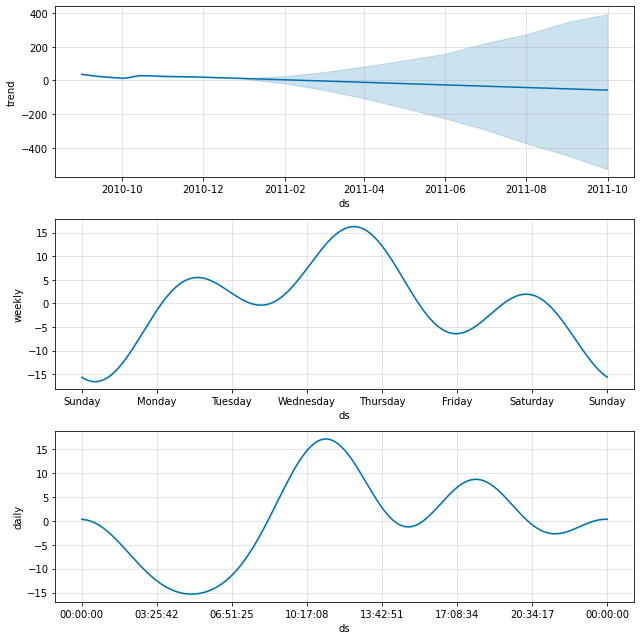

In [77]:
fig1 = model.plot_components(forecast)

### **Q17 - Q19**

In [83]:
path = '/content/drive/MyDrive/Internship/Homoye/Stage E/dataset/Time_series_analysis_and_forecast_DATASET.csv'
df1 = pd.read_csv(path)
df1 = df1.rename(columns={'FullDate':'ds', 'ElecPrice': 'y'})
train = df1.iloc[:2757, :]
test = df1.iloc[2757:, :]
model1 = Prophet()
model1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [84]:
#predict for the next 10 months
future1 = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast1 = model.predict(future1)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,37.069420,-91.685865,171.957852,37.069420,37.069420,7.708134,7.708134,7.708134,0.310292,0.310292,0.310292,7.397842,7.397842,7.397842,0.0,0.0,0.0,44.777554
1,2010-09-01 01:00:00,37.021443,-83.512848,169.705731,37.021443,37.021443,6.711959,6.711959,6.711959,-1.572262,-1.572262,-1.572262,8.284221,8.284221,8.284221,0.0,0.0,0.0,43.733402
2,2010-09-01 02:00:00,36.973466,-80.771284,154.458006,36.973466,36.973466,3.175200,3.175200,3.175200,-5.994929,-5.994929,-5.994929,9.170129,9.170129,9.170129,0.0,0.0,0.0,40.148666
3,2010-09-01 03:00:00,36.925489,-90.211454,164.549719,36.925489,36.925489,-0.803914,-0.803914,-0.803914,-10.849093,-10.849093,-10.849093,10.045180,10.045180,10.045180,0.0,0.0,0.0,36.121575
4,2010-09-01 04:00:00,36.877512,-91.533085,165.367480,36.877512,36.877512,-3.288212,-3.288212,-3.288212,-14.187172,-14.187172,-14.187172,10.898960,10.898960,10.898960,0.0,0.0,0.0,33.589300


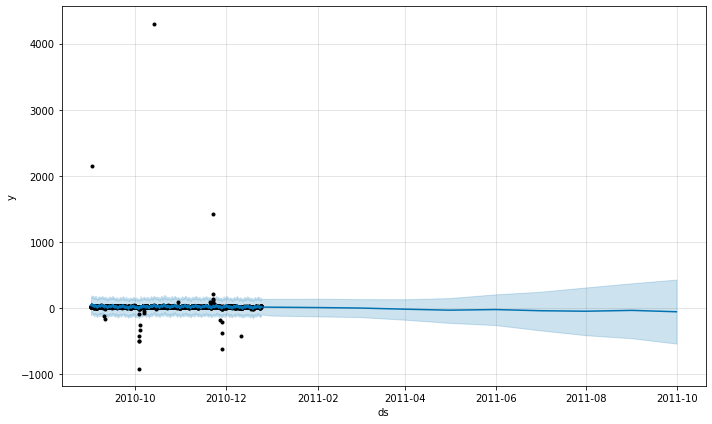

In [85]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
plt.show()

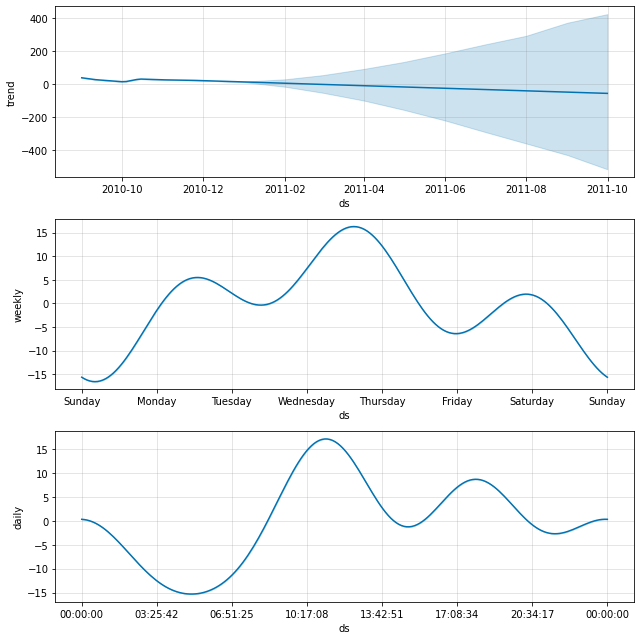

In [87]:
fig = model1.plot_components(forecast1)

**Wednesday** has highest value of daily seasonality.